In [2]:
import numpy as np
from math import sqrt
from scipy.interpolate import barycentric_interpolate as bint
from scipy.optimize import root
from matplotlib import pyplot as plt

### Problem 1

In [3]:
c = lambda x : -7/10*(x**2-1)
alpha = lambda x : 1/(1-c(x)**2)**(.5)
def L(x,y,y_prime) :
    return alpha(x)*(1+(alpha(x)*y_prime(x))**2)**(.5) - alpha(x)**2*c(x)*y_prime(x)

def T(y) :
    x = np.linspace(-1,1,1000)
    h = x[1]-x[0]
    y_prime = lambda x : (y(x+h)-y(x-h))/(2*h)
    mid_sum = sum([L(x[i],y,y_prime) for i in range(1,len(x)-1)])
    mid_sum += L(x[0],y,y_prime) + L(x[-1],y,y_prime)
    return h*mid_sum

### Problem 2

In [4]:
y = lambda x : 5/2*(x+1)
y_prime = lambda x : 5/2*np.ones_like(x)
print('Upper bound : {}'.format(T(y)))

Upper bound : 3.882474942504681


Lower bound is 2 because $\int_{-1}^{1} \sec\left(\theta(x)\right) \,\mathrm{d}x \geq \int_{-1}^{1} \,\mathrm{d}x = 2$.

### Problem 3

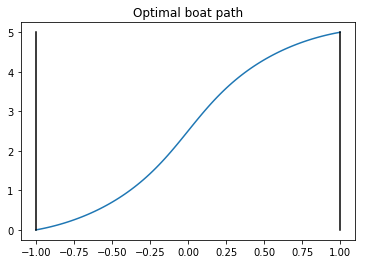

In [10]:
def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

N = 30
D, x = cheb(N)

def F(U) :
    l = alpha(x)**3*np.dot(D,U)/(1+alpha(x)**2*np.dot(D,U)**2)**(.5)-alpha(x)**2*c(x)
    out = np.dot(D,l)  #Set up the equation you want the root of.
    #Make sure to set the boundaries correctly
    out[0] = U[0] - 5
    out[-1] = U[-1] - 0
    return out  #Newtons Method will update U until the output is all 0's.

guess = y(x)   #Make your guess, same size as the cheb(N) output
solution = root(F, guess).x
x_even = np.linspace(-1,1,100)
sol = bint(x,solution,x_even)
plt.plot(x_even,sol)
plt.plot(-1*np.ones_like(solution),solution,'-k')
plt.plot(np.ones_like(solution),solution,'-k')
plt.title('Optimal boat path')
plt.show()

### Problem 4

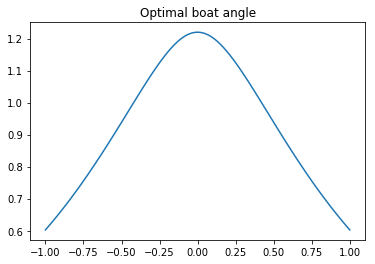

In [13]:
N = 30
D, x = cheb(N)
D_approx = np.dot(D,solution)

def F(U) :
    out = D_approx - (np.sin(U) + c(x))/np.cos(U)
    return out  #Newtons Method will update U until the output is all 0's.

guess = np.ones_like(x)   #Make your guess, same size as the cheb(N) output
solution = root(F, guess).x
x_even = np.linspace(-1,1,100)
sol = bint(x,solution,x_even)
plt.plot(x_even,sol)
plt.title('Optimal boat angle')
plt.show()